# Problem 2: Loan dataset with EDA and regression algorithms


In [1202]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import math


# Exploration of the dataset

In [1205]:
loan_data_01 = pd.read_csv(r'C:\Users\steve\OneDrive\Bureaublad\Karlstad university\Exam files\loan_data.csv', delimiter = ',')
display(loan_data_01)


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [1207]:
loan_data_01.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [1209]:
#check for missing values
loan_data_01.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [1211]:
# All object datatypes needed to be labeled and transfromed to integer data types in order to obtain the basic summary of all the relevant data columns 
# For the person_education feature one additional step was needed. This was because the 'High School' string resulted in a NaN value while applying the map function

loan_data_01['person_gender'] = loan_data_01['person_gender'].map(dict(female=0, male=1))
loan_data_01['person_education'] = loan_data_01['person_education'].map(dict(High_School=1, Associate=2, Bachelor=3, Master=4))
loan_data_01['person_education'] = loan_data_01['person_education'].fillna(1)

loan_data_01['person_home_ownership'] = loan_data_01['person_home_ownership'].map(dict(RENT=1, MORTGAGE=2, OWN=3, OTHER=4))
loan_data_01['loan_intent'] = loan_data_01['loan_intent'].map(dict(PERSONAL=1, MEDICAL=2, EDUCATION=3, HOMEIMPROVEMENT=4, DEBTCONSOLIDATION=5, VENTURE=6))
loan_data_01['previous_loan_defaults_on_file'] = loan_data_01['previous_loan_defaults_on_file'].map(dict(No=0, Yes=1))


In [1213]:
display(loan_data_01)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4.0,71948.0,0,1,35000.0,1,16.02,0.49,3.0,561,0,1
1,21.0,0,1.0,12282.0,0,3,1000.0,3,11.14,0.08,2.0,504,1,0
2,25.0,0,1.0,12438.0,3,2,5500.0,2,12.87,0.44,3.0,635,0,1
3,23.0,0,3.0,79753.0,0,1,35000.0,2,15.23,0.44,2.0,675,0,1
4,24.0,1,4.0,66135.0,1,1,35000.0,2,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,2.0,47971.0,6,1,15000.0,2,15.66,0.31,3.0,645,0,1
44996,37.0,0,2.0,65800.0,17,1,9000.0,4,14.07,0.14,11.0,621,0,1
44997,33.0,1,2.0,56942.0,7,1,2771.0,5,10.02,0.05,10.0,668,0,1
44998,29.0,1,3.0,33164.0,4,1,12000.0,3,13.23,0.36,6.0,604,0,1


In [1215]:
loan_data_01.dtypes

person_age                        float64
person_gender                       int64
person_education                  float64
person_income                     float64
person_emp_exp                      int64
person_home_ownership               int64
loan_amnt                         float64
loan_intent                         int64
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file      int64
loan_status                         int64
dtype: object

# Exploratory data analysis

### Summary of statistics

In [1219]:
loan_data_01.describe()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
count,45000.000000,45000.000000,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,0.552022,2.328133,8.031905e+04,5.410333,1.549822,9583.157556,3.419511,11.006606,0.139725,5.867489,632.608756,0.507956,0.222222
std,6.045108,0.497292,1.044221,8.042250e+04,6.063532,0.627919,6314.886691,1.729312,2.978808,0.087212,3.879702,50.435865,0.499942,0.415744
min,20.000000,0.000000,1.000000,8.000000e+03,0.000000,1.000000,500.000000,1.000000,5.420000,0.000000,2.000000,390.000000,0.000000,0.000000
25%,24.000000,0.000000,1.000000,4.720400e+04,1.000000,1.000000,5000.000000,2.000000,8.590000,0.070000,3.000000,601.000000,0.000000,0.000000
50%,26.000000,1.000000,2.000000,6.704800e+04,4.000000,1.000000,8000.000000,3.000000,11.010000,0.120000,4.000000,640.000000,1.000000,0.000000
75%,30.000000,1.000000,3.000000,9.578925e+04,8.000000,2.000000,12237.250000,5.000000,12.990000,0.190000,8.000000,670.000000,1.000000,0.000000
max,144.000000,1.000000,4.000000,7.200766e+06,125.000000,4.000000,35000.000000,6.000000,20.000000,0.660000,30.000000,850.000000,1.000000,1.000000


## Boxplot visualizations

In [1222]:
import sklearn
from scipy import stats

{'whiskers': [<matplotlib.lines.Line2D at 0x249c4470350>,
 'caps': [<matplotlib.lines.Line2D at 0x249c4470500>,
 'boxes': [<matplotlib.lines.Line2D at 0x249c4473e90>],
 'medians': [<matplotlib.lines.Line2D at 0x249ca903e00>],
 'fliers': [<matplotlib.lines.Line2D at 0x249ca9032f0>],
 'means': []}

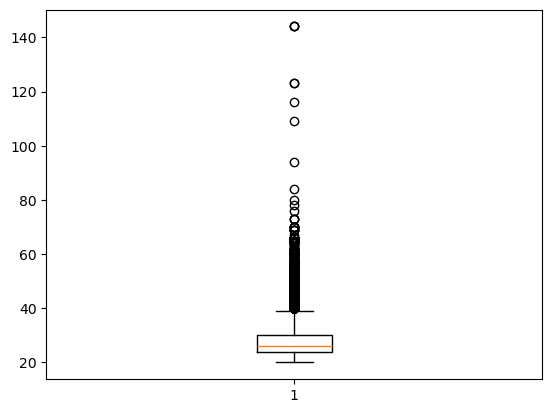

In [1224]:
plot1 = loan_data_01['person_age']
plt.boxplot(plot1)


{'whiskers': [<matplotlib.lines.Line2D at 0x249ca945f10>,
 'caps': [<matplotlib.lines.Line2D at 0x249ca946c90>,
 'boxes': [<matplotlib.lines.Line2D at 0x249ca8deed0>],
 'medians': [<matplotlib.lines.Line2D at 0x249ca946c00>],
 'fliers': [<matplotlib.lines.Line2D at 0x249ca947290>],
 'means': []}

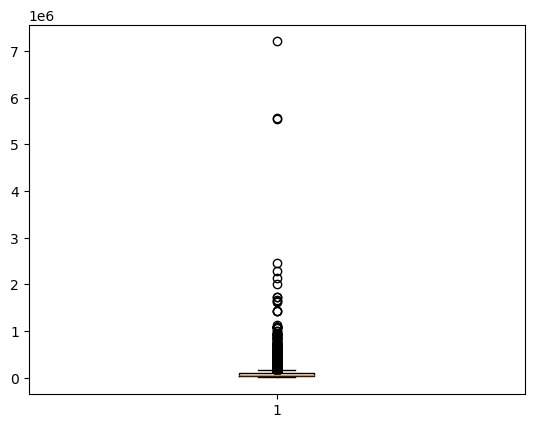

In [1226]:
plot2 = loan_data_01['person_income']
plt.boxplot(plot2)


{'whiskers': [<matplotlib.lines.Line2D at 0x249c59c6b10>,
 'caps': [<matplotlib.lines.Line2D at 0x249cad383e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x249c722f860>],
 'medians': [<matplotlib.lines.Line2D at 0x249cad38560>],
 'fliers': [<matplotlib.lines.Line2D at 0x249cad388f0>],
 'means': []}

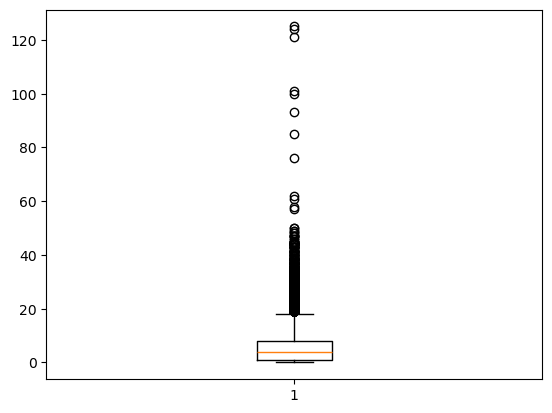

In [1228]:
plot3 = loan_data_01['person_emp_exp']
plt.boxplot(plot3)


{'whiskers': [<matplotlib.lines.Line2D at 0x249c5f67bf0>,
 'caps': [<matplotlib.lines.Line2D at 0x249cc096ff0>,
 'boxes': [<matplotlib.lines.Line2D at 0x249c5f359d0>],
 'medians': [<matplotlib.lines.Line2D at 0x249c4320ec0>],
 'fliers': [<matplotlib.lines.Line2D at 0x249c4320cb0>],
 'means': []}

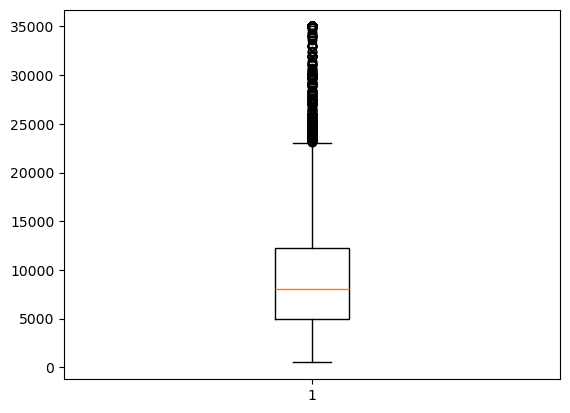

In [1230]:
plot4 = loan_data_01['loan_amnt']
plt.boxplot(plot4)


{'whiskers': [<matplotlib.lines.Line2D at 0x249c613f710>,
 'caps': [<matplotlib.lines.Line2D at 0x249c613fc50>,
 'boxes': [<matplotlib.lines.Line2D at 0x249c613f4a0>],
 'medians': [<matplotlib.lines.Line2D at 0x249c613c5c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x249c60ea420>],
 'means': []}

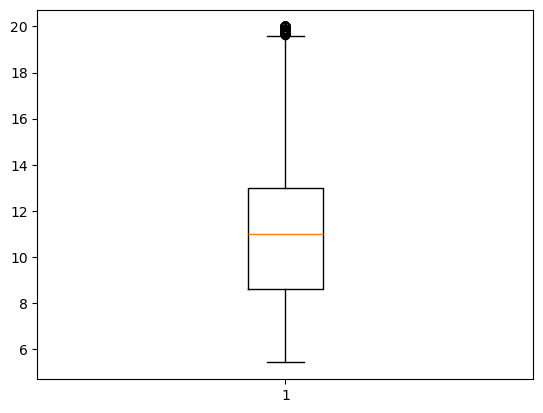

In [1232]:
plot5 = loan_data_01['loan_int_rate']
plt.boxplot(plot5)


{'whiskers': [<matplotlib.lines.Line2D at 0x249cad82720>,
 'caps': [<matplotlib.lines.Line2D at 0x249cad82f00>,
 'boxes': [<matplotlib.lines.Line2D at 0x249cad823f0>],
 'medians': [<matplotlib.lines.Line2D at 0x249cad83350>],
 'fliers': [<matplotlib.lines.Line2D at 0x249cad835c0>],
 'means': []}

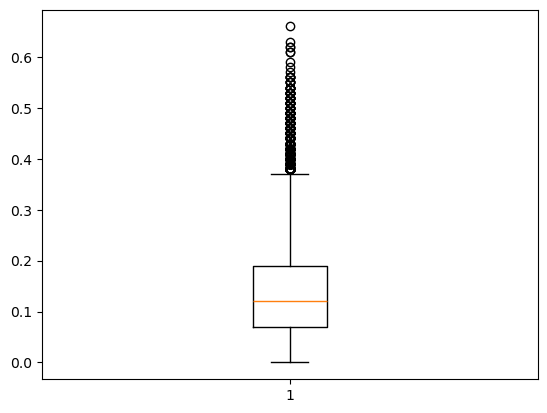

In [1234]:
plot6 = loan_data_01['loan_percent_income']
plt.boxplot(plot6)


{'whiskers': [<matplotlib.lines.Line2D at 0x249c8659850>,
 'caps': [<matplotlib.lines.Line2D at 0x249c865b4d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x249c865b170>],
 'medians': [<matplotlib.lines.Line2D at 0x249c865b800>],
 'fliers': [<matplotlib.lines.Line2D at 0x249c865a5a0>],
 'means': []}

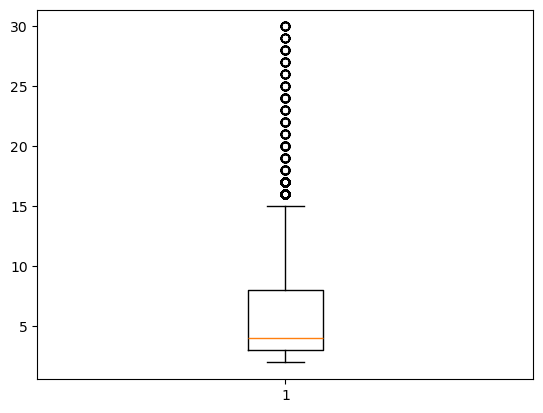

In [1236]:
plot7 = loan_data_01['cb_person_cred_hist_length']
plt.boxplot(plot7)


{'whiskers': [<matplotlib.lines.Line2D at 0x249c60cfcb0>,
 'caps': [<matplotlib.lines.Line2D at 0x249cade9a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x249c60cea20>],
 'medians': [<matplotlib.lines.Line2D at 0x249c60ce840>],
 'fliers': [<matplotlib.lines.Line2D at 0x249c60cf320>],
 'means': []}

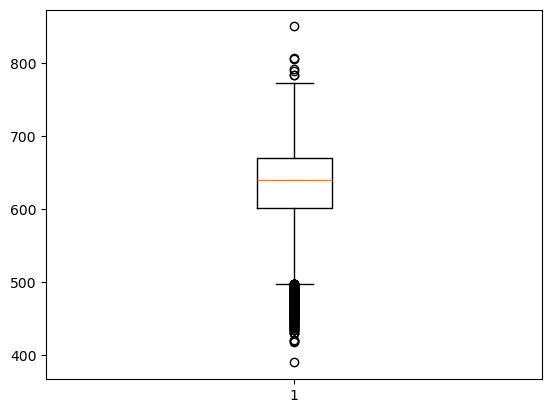

In [1238]:
plot8 = loan_data_01['credit_score']
plt.boxplot(plot8)


## Outlier removals

code from source: 

In [1241]:
#https://mathblog.com/data-insights/python/calculate-z-scores/

means = np.mean(loan_data_01, axis=0)
std_dev = np.std(loan_data_01, axis=0)
z_scores = (loan_data_01 - means) / std_dev
print(z_scores)


       person_age  person_gender  person_education  person_income  \
0       -0.953538      -1.110069          1.601084      -0.104090   
1       -1.118963      -1.110069         -1.271903      -0.846005   
2       -0.457264      -1.110069         -1.271903      -0.844065   
3       -0.788113      -1.110069          0.643421      -0.007039   
4       -0.622689       0.900845          1.601084      -0.176371   
...           ...            ...               ...            ...   
44995   -0.126414       0.900845         -0.314241      -0.402231   
44996    1.527834      -1.110069         -0.314241      -0.180537   
44997    0.866135       0.900845         -0.314241      -0.290681   
44998    0.204436       0.900845          0.643421      -0.586348   
44999   -0.622689       0.900845         -1.271903      -0.356994   

       person_emp_exp  person_home_ownership  loan_amnt  loan_intent  \
0           -0.892284              -0.875636   4.024953    -1.399133   
1           -0.892284      

In [1243]:
#removing the upper outliers

threshold_z = 3

outlier_indices = np.where(z_scores > threshold_z)[0]
loan_data_02 = loan_data_01.drop(outlier_indices)

print(loan_data_01.shape)
print(loan_data_02.shape)


(45000, 14)
(42886, 14)


In [1245]:
display(loan_data_02)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21.0,0,1.0,12282.0,0,3,1000.0,3,11.14,0.08,2.0,504,1,0
5,21.0,0,1.0,12951.0,0,3,2500.0,6,7.14,0.19,2.0,532,0,1
9,21.0,0,1.0,12739.0,0,3,1600.0,6,14.74,0.13,3.0,640,0,1
11,21.0,0,2.0,13113.0,0,3,4500.0,4,8.63,0.34,2.0,651,0,1
19,24.0,0,4.0,14283.0,1,2,1750.0,3,10.99,0.12,2.0,679,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,2.0,47971.0,6,1,15000.0,2,15.66,0.31,3.0,645,0,1
44996,37.0,0,2.0,65800.0,17,1,9000.0,4,14.07,0.14,11.0,621,0,1
44997,33.0,1,2.0,56942.0,7,1,2771.0,5,10.02,0.05,10.0,668,0,1
44998,29.0,1,3.0,33164.0,4,1,12000.0,3,13.23,0.36,6.0,604,0,1


## Histograms

In [1248]:
loan_data_03 = loan_data_02[['person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score']]



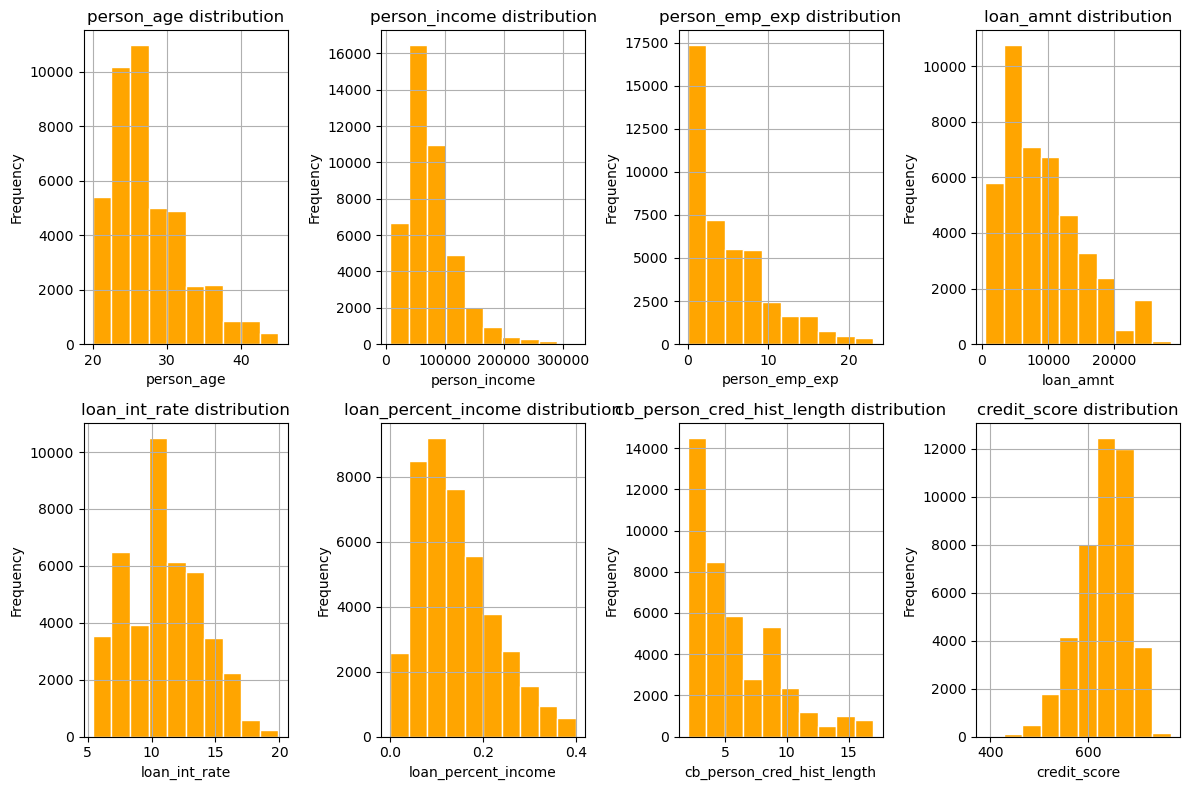

In [1250]:
#https://python-graph-gallery.com/529-multi-group-histogram-pandas/

# Initialize a 3x3 charts
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 8))

# Flatten the axes array (makes it easier to iterate over)
axes = axes.flatten()

# Loop through each column and plot a histogram
for i, column in enumerate(loan_data_03.columns):
    
    # Add the histogram
    loan_data_03[column].hist(ax=axes[i], # Define on which ax we're working on
                    edgecolor='white', # Color of the border
                    color='orange' # Color of the bins
                   )
    
    # Add title and axis label
    axes[i].set_title(f'{column} distribution') 
    axes[i].set_xlabel(column) 
    axes[i].set_ylabel('Frequency') 

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Distribution plots

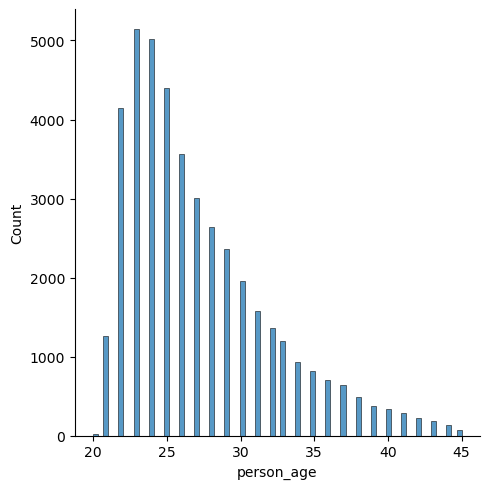

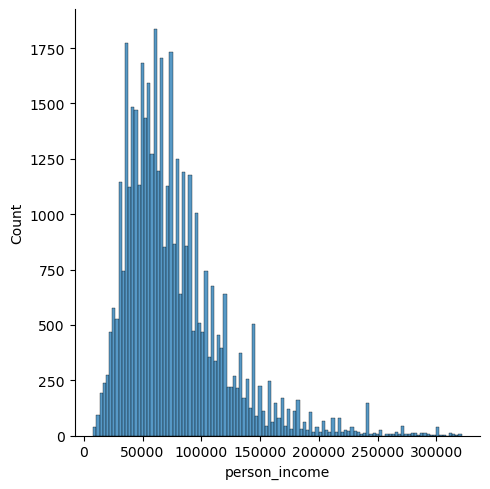

In [1253]:
sns.displot(loan_data_03['person_age'])
sns.displot(loan_data_03['person_income'])

plt.show()


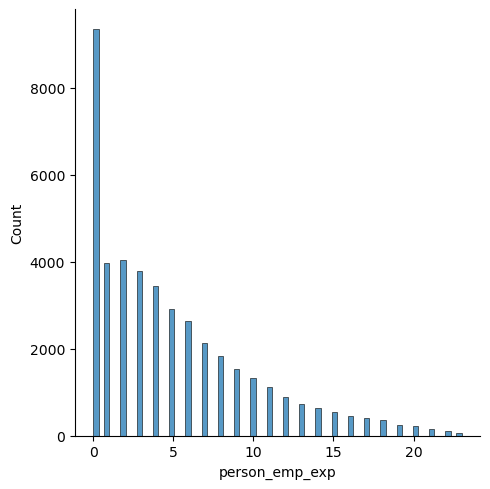

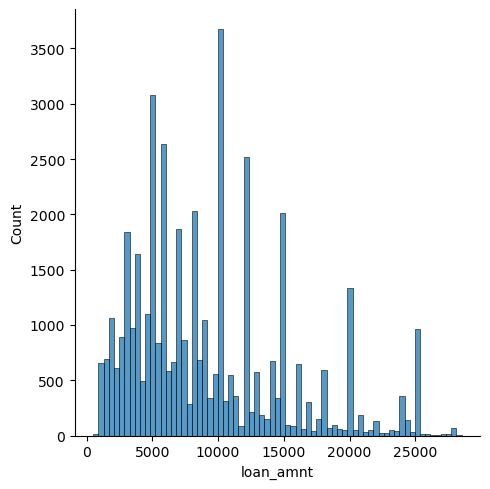

In [1255]:
sns.displot(loan_data_03['person_emp_exp'])
sns.displot(loan_data_03['loan_amnt'])

plt.show()

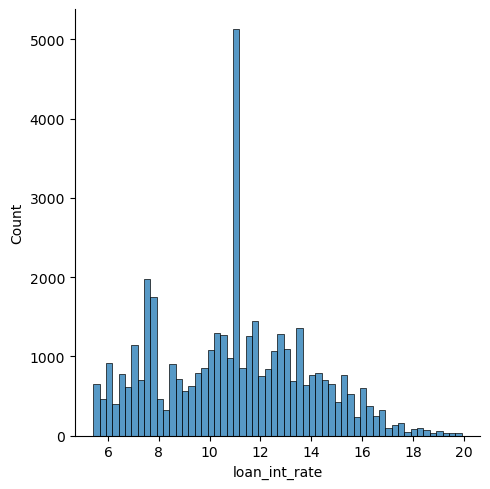

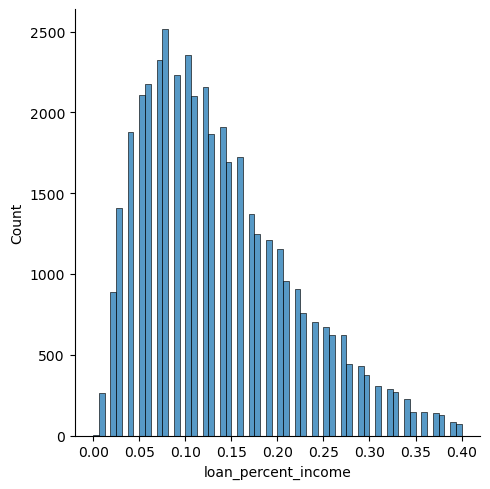

In [1257]:
sns.displot(loan_data_03['loan_int_rate'])
sns.displot(loan_data_03['loan_percent_income'])

plt.show()

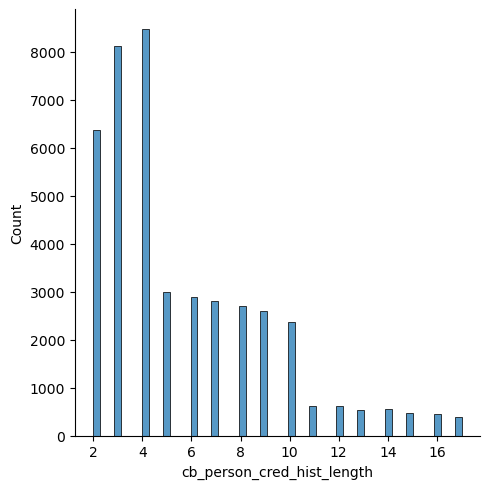

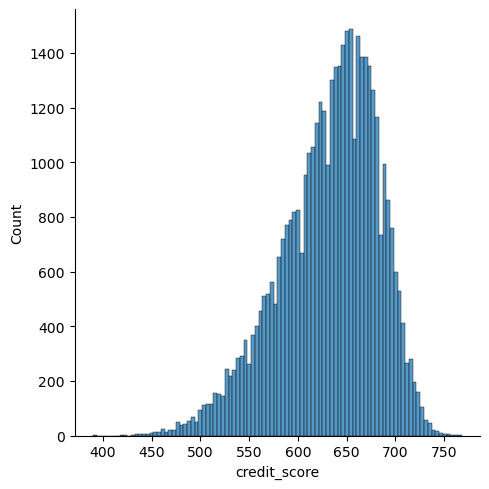

In [1259]:
sns.displot(loan_data_03['cb_person_cred_hist_length'])
sns.displot(loan_data_03['credit_score'])

plt.show()

## Frequency Bar plots

<Axes: title={'center': 'Gender types, 1=male 0=female'}, xlabel='person_gender'>

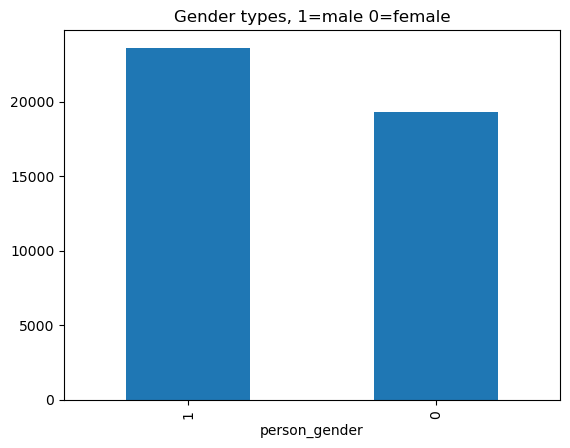

In [1262]:
loan_data_02['person_gender'].value_counts().plot.bar(title='Gender types, 1=male 0=female')

<Axes: title={'center': 'Person education, 1.0=high school 2.0=associate 3.0=bachelor 4.0=master'}, xlabel='person_education'>

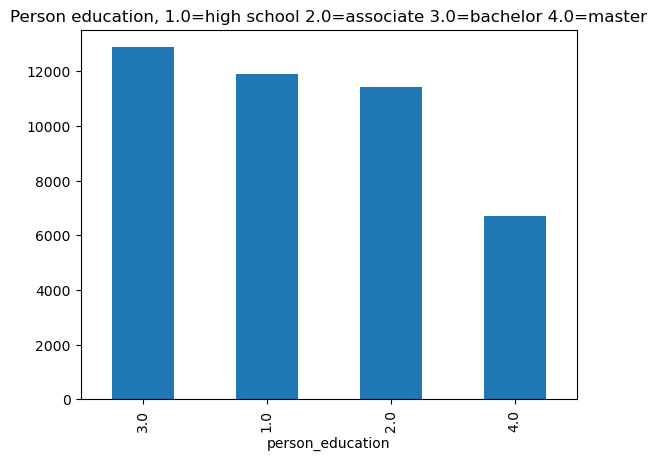

In [1264]:
loan_data_02['person_education'].value_counts().plot.bar(title='Person education, 1.0=high school 2.0=associate 3.0=bachelor 4.0=master')

<Axes: title={'center': 'Person home ownership, 1=rent 2=mortgage 3=own 4=other'}, xlabel='person_home_ownership'>

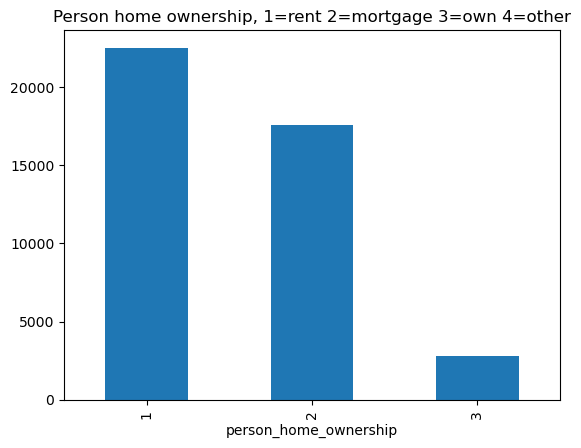

In [1266]:
loan_data_02['person_home_ownership'].value_counts().plot.bar(title='Person home ownership, 1=rent 2=mortgage 3=own 4=other')

<Axes: title={'center': 'Loan intent, 1=personal 2=medical 3=education 4=home improvement 5=debt consolidation 6=venture'}, xlabel='loan_intent'>

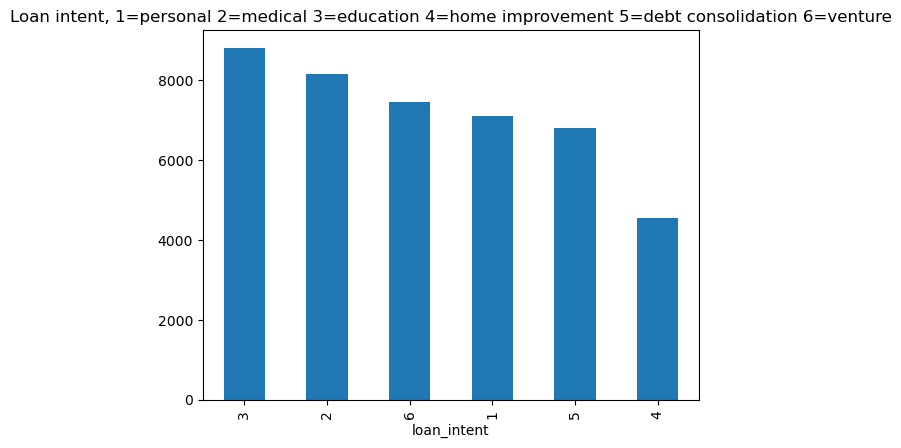

In [1268]:
loan_data_02['loan_intent'].value_counts().plot.bar(title='Loan intent, 1=personal 2=medical 3=education 4=home improvement 5=debt consolidation 6=venture')

<Axes: title={'center': 'Loan intent, 0=No 1=Yes'}, xlabel='previous_loan_defaults_on_file'>

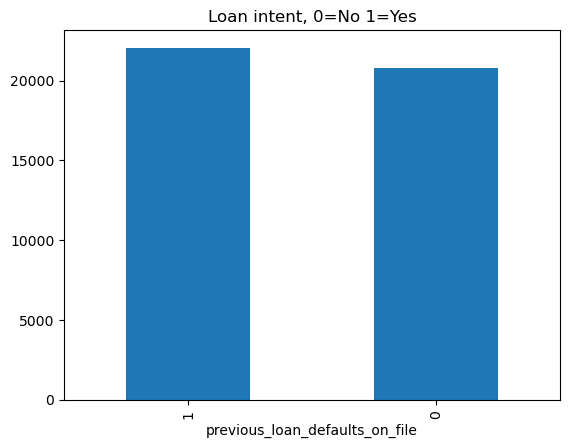

In [1270]:
loan_data_02['previous_loan_defaults_on_file'].value_counts().plot.bar(title='Loan intent, 0=No 1=Yes')

#### Frequency bar plot of the target variable loan status

<Axes: title={'center': 'Loan status, 0=No 1=Yes'}, xlabel='loan_status'>

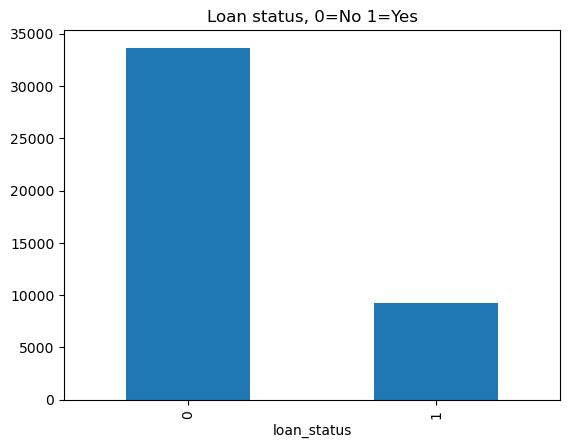

In [1273]:
loan_data_02['loan_status'].value_counts().plot.bar(title='Loan status, 0=No 1=Yes')

# Regression models

In [1276]:
# source: https://medium.com/@shuv.sdr/simple-linear-regression-in-python-a0069b325bf8

In [1278]:
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


## Correlation of predicive features with target feature loan_status


In [1281]:
correlation = loan_data_02.corr(method="spearman")['credit_score']
print(correlation) 

person_age                        0.144722
person_gender                    -0.002634
person_education                  0.193843
person_income                     0.019673
person_emp_exp                    0.156287
person_home_ownership             0.003921
loan_amnt                         0.005386
loan_intent                       0.004295
loan_int_rate                     0.010822
loan_percent_income              -0.009968
cb_person_cred_hist_length        0.126381
credit_score                      1.000000
previous_loan_defaults_on_file   -0.177485
loan_status                      -0.008479
Name: credit_score, dtype: float64


In [1283]:
# top five correlated variables with the target variabl

sorted = correlation.sort_values(key=abs)
top5 = slice(8,-1)
print(sorted[top5])

cb_person_cred_hist_length        0.126381
person_age                        0.144722
person_emp_exp                    0.156287
previous_loan_defaults_on_file   -0.177485
person_education                  0.193843
Name: credit_score, dtype: float64


## Linear regression model

In [1286]:
# source: https://medium.com/@shuv.sdr/simple-linear-regression-in-python-a0069b325bf8

In [1288]:

loan_data_04 = loan_data_02[['person_emp_exp','credit_score']]



In [1290]:
display(loan_data_04)

,person_emp_exp,credit_score
1,0,504
5,0,532
9,0,640
11,0,651
19,1,679
...,...,...
44995,6,645
44996,17,621
44997,7,668
44998,4,604


In [1292]:
X = loan_data_04.iloc[:, :-1]
y = loan_data_04.iloc[:,-1:]


In [1294]:
print(X.shape)
display(X)

(42886, 1)


,person_emp_exp
1,0
5,0
9,0
11,0
19,1
...,...
44995,6
44996,17
44997,7
44998,4


In [1296]:
print(y.shape)
display(y)

(42886, 1)


,credit_score
1,504
5,532
9,640
11,651
19,679
...,...
44995,645
44996,621
44997,668
44998,604


In [1298]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [1300]:
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [1302]:
# Prediction result
y_pred_test = regressor.predict(X_test)     
y_pred_train = regressor.predict(X_train)   

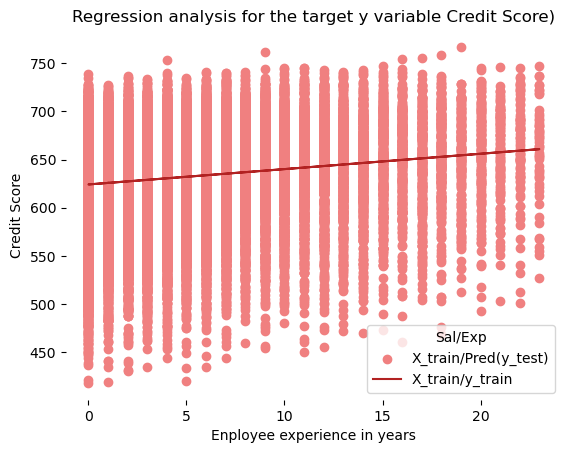

In [1304]:
# Prediction on training set
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Regression analysis for the target y variable Credit Score)')
plt.xlabel('Enployee experience in years')
plt.ylabel('Credit Score')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()


In [1306]:
y_pred = regressor.predict(X_test)
display(y_pred)


array([[635.3092471 ],
       [627.33934949],
       [649.65506279],
       ...,
       [624.15139044],
       [627.33934949],
       [636.90322662]])

In [1308]:
#calculation of the root mean_squared_error
print(np.sqrt(mean_squared_error(y_test, y_pred)))

49.19106781721484


In [1310]:
#calculation of mean absolute error
print(mean_absolute_error(y_test, y_pred))

39.3834972806877


## Lasso regression

In [1313]:
from sklearn import linear_model

In [1315]:

loan_data_05 = loan_data_02.drop(columns=['credit_score'])


In [1317]:
X = loan_data_05
y = loan_data_02.iloc[:, -3:-2]



In [1319]:
display(X)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,previous_loan_defaults_on_file,loan_status
1,21.0,0,1.0,12282.0,0,3,1000.0,3,11.14,0.08,2.0,1,0
5,21.0,0,1.0,12951.0,0,3,2500.0,6,7.14,0.19,2.0,0,1
9,21.0,0,1.0,12739.0,0,3,1600.0,6,14.74,0.13,3.0,0,1
11,21.0,0,2.0,13113.0,0,3,4500.0,4,8.63,0.34,2.0,0,1
19,24.0,0,4.0,14283.0,1,2,1750.0,3,10.99,0.12,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,2.0,47971.0,6,1,15000.0,2,15.66,0.31,3.0,0,1
44996,37.0,0,2.0,65800.0,17,1,9000.0,4,14.07,0.14,11.0,0,1
44997,33.0,1,2.0,56942.0,7,1,2771.0,5,10.02,0.05,10.0,0,1
44998,29.0,1,3.0,33164.0,4,1,12000.0,3,13.23,0.36,6.0,0,1


In [1321]:
display(y)

,credit_score
1,504
5,532
9,640
11,651
19,679
...,...
44995,645
44996,621
44997,668
44998,604


In [1323]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [1325]:
#https://www.analyticsvidhya.com/blog/2021/05/5-regression-algorithms-you-should-know-introductory-guide/

LassoRegression = linear_model.Lasso(alpha=0.1)
LassoRegression.fit(X,y)


Lasso(alpha=0.1)

In [1327]:
y_pred = LassoRegression.predict(X_test)
display(y_pred)

array([641.04342457, 615.76145583, 671.59589538, ..., 604.2238161 ,
       607.42429126, 642.79054477])

In [1329]:
#calculation of the root mean_squared_error
print(np.sqrt(mean_squared_error(y_test, y_pred)))

47.05039919326669


In [1331]:
#calculation of mean absolute error
print(mean_absolute_error(y_test, y_pred))

37.6738167599151


## Decision tree

In [1334]:
from sklearn.tree import DecisionTreeRegressor


In [1338]:
display(loan_data_05)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,previous_loan_defaults_on_file,loan_status
1,21.0,0,1.0,12282.0,0,3,1000.0,3,11.14,0.08,2.0,1,0
5,21.0,0,1.0,12951.0,0,3,2500.0,6,7.14,0.19,2.0,0,1
9,21.0,0,1.0,12739.0,0,3,1600.0,6,14.74,0.13,3.0,0,1
11,21.0,0,2.0,13113.0,0,3,4500.0,4,8.63,0.34,2.0,0,1
19,24.0,0,4.0,14283.0,1,2,1750.0,3,10.99,0.12,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,2.0,47971.0,6,1,15000.0,2,15.66,0.31,3.0,0,1
44996,37.0,0,2.0,65800.0,17,1,9000.0,4,14.07,0.14,11.0,0,1
44997,33.0,1,2.0,56942.0,7,1,2771.0,5,10.02,0.05,10.0,0,1
44998,29.0,1,3.0,33164.0,4,1,12000.0,3,13.23,0.36,6.0,0,1


In [1340]:

X = loan_data_05
y = loan_data_02.iloc[:, -3:-2]


In [1342]:
display(X)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,previous_loan_defaults_on_file,loan_status
1,21.0,0,1.0,12282.0,0,3,1000.0,3,11.14,0.08,2.0,1,0
5,21.0,0,1.0,12951.0,0,3,2500.0,6,7.14,0.19,2.0,0,1
9,21.0,0,1.0,12739.0,0,3,1600.0,6,14.74,0.13,3.0,0,1
11,21.0,0,2.0,13113.0,0,3,4500.0,4,8.63,0.34,2.0,0,1
19,24.0,0,4.0,14283.0,1,2,1750.0,3,10.99,0.12,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,2.0,47971.0,6,1,15000.0,2,15.66,0.31,3.0,0,1
44996,37.0,0,2.0,65800.0,17,1,9000.0,4,14.07,0.14,11.0,0,1
44997,33.0,1,2.0,56942.0,7,1,2771.0,5,10.02,0.05,10.0,0,1
44998,29.0,1,3.0,33164.0,4,1,12000.0,3,13.23,0.36,6.0,0,1


In [1344]:
display(y)

,credit_score
1,504
5,532
9,640
11,651
19,679
...,...
44995,645
44996,621
44997,668
44998,604


In [1346]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [1348]:
RegressionTree = DecisionTreeRegressor(max_depth=3)
RegressionTree.fit(X, y)


DecisionTreeRegressor(max_depth=3)

In [1350]:
y_pred = RegressionTree.predict(X_test)
display(y_pred)

array([641.04895871, 610.30845584, 657.26661939, ..., 610.30845584,
       610.30845584, 639.924174  ])

In [1352]:
#calculation of root mean_squared_error
print(np.sqrt(mean_squared_error(y_test, y_pred)))

47.68319025747662


In [1354]:
#calculation of mean absolute error
print(mean_absolute_error(y_test, y_pred))

38.18471431976042


## Random Forest

In [1357]:
from sklearn.ensemble import RandomForestRegressor


In [1361]:

X = loan_data_05
y = loan_data_02.iloc[:, -3:-2]


In [1363]:
display(X)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,previous_loan_defaults_on_file,loan_status
1,21.0,0,1.0,12282.0,0,3,1000.0,3,11.14,0.08,2.0,1,0
5,21.0,0,1.0,12951.0,0,3,2500.0,6,7.14,0.19,2.0,0,1
9,21.0,0,1.0,12739.0,0,3,1600.0,6,14.74,0.13,3.0,0,1
11,21.0,0,2.0,13113.0,0,3,4500.0,4,8.63,0.34,2.0,0,1
19,24.0,0,4.0,14283.0,1,2,1750.0,3,10.99,0.12,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,2.0,47971.0,6,1,15000.0,2,15.66,0.31,3.0,0,1
44996,37.0,0,2.0,65800.0,17,1,9000.0,4,14.07,0.14,11.0,0,1
44997,33.0,1,2.0,56942.0,7,1,2771.0,5,10.02,0.05,10.0,0,1
44998,29.0,1,3.0,33164.0,4,1,12000.0,3,13.23,0.36,6.0,0,1


In [1365]:
display(y)

,credit_score
1,504
5,532
9,640
11,651
19,679
...,...
44995,645
44996,621
44997,668
44998,604


In [1367]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [1369]:
RandomForest = RandomForestRegressor(max_depth=3)
RandomForest.fit(X, y)


C:\Users\steve\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=3)

In [1370]:
y_pred = RandomForest.predict(X_test)
display(y_pred)

array([633.69116919, 610.43917428, 657.2381296 , ..., 610.43917428,
       610.43917428, 639.95094251])

In [1375]:
#calculation of mean_squared_error
print(np.sqrt(mean_squared_error(y_test, y_pred)))

47.60983516178149


In [1377]:
#calculation of mean absolute error
print(mean_absolute_error(y_test, y_pred))

38.12588933029157


End of notebook: Loan_Prediction